# Assignment

In [1]:
# Imports
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Import wine data

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = data['data']
y = data['target']

In [3]:
y_data = y

This data is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

1. Scale the data (clustering is sensitive to scale)
2. Find the distance between pairs of all 13-dimensional vectors. Use `pdist`.
3. Use linkage to create the clusters, try different linkage methods.
4. Visualize your clusters using `dendrogram`.
5. Get the top 3 clusters using `fcluster`.
6. Compare your top 3 clusters to the actual data.

### 1. Scale the data

In [4]:
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

### 2. Find the distance

In [5]:
distance = pdist(scaled)

### 3. Use linkage to create clusters

In [6]:
single_linkage = linkage(distance, method='single')

In [7]:
complete_linkage = linkage(distance, method='complete')

In [8]:
average_linkage = linkage(distance, method='average')

In [9]:
weighted_linkage = linkage(distance, method='weighted')

In [10]:
centroid_linkage = linkage(distance, method='centroid')

In [11]:
median_linkage = linkage(distance, method='median')

In [12]:
ward_linkage = linkage(distance, method='ward')

### 4. Visualize clusters

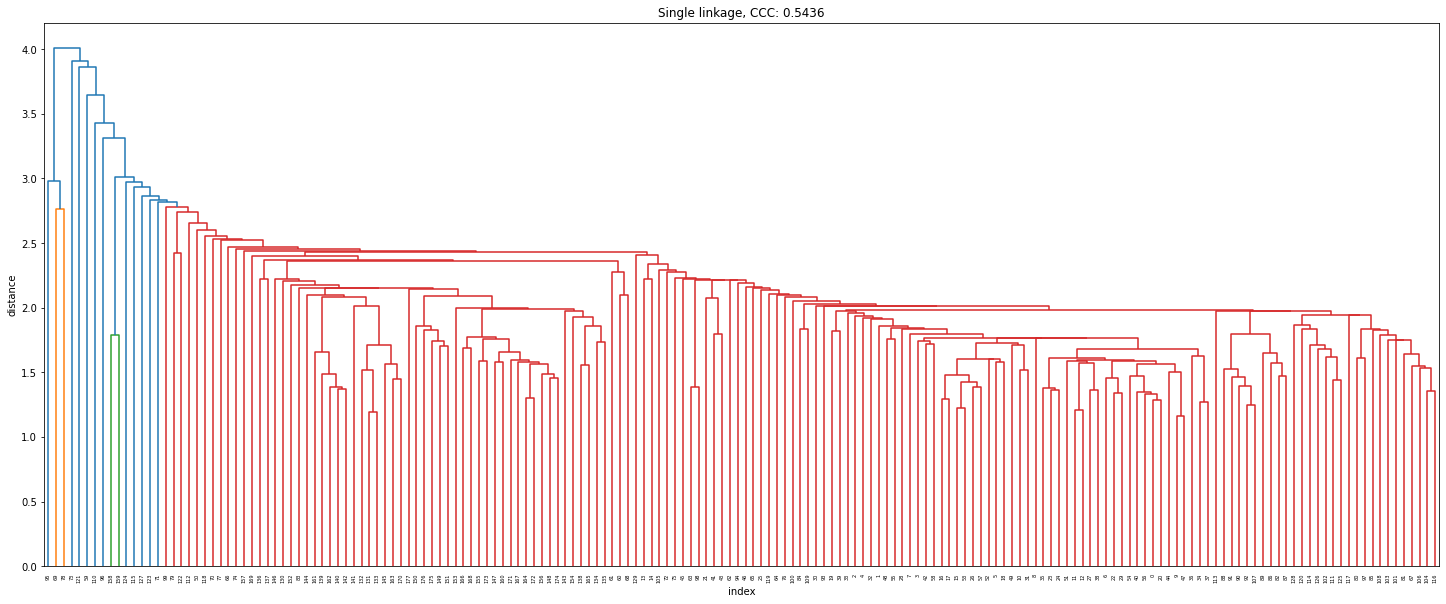

In [13]:
fig, ax = plt.subplots(figsize=(25, 10))
dn = dendrogram(single_linkage)
plt.xlabel('index')
plt.ylabel('distance')
plt.title(f'Single linkage, CCC: {cophenet(single_linkage, distance)[0]:0.4f}')
plt.show()

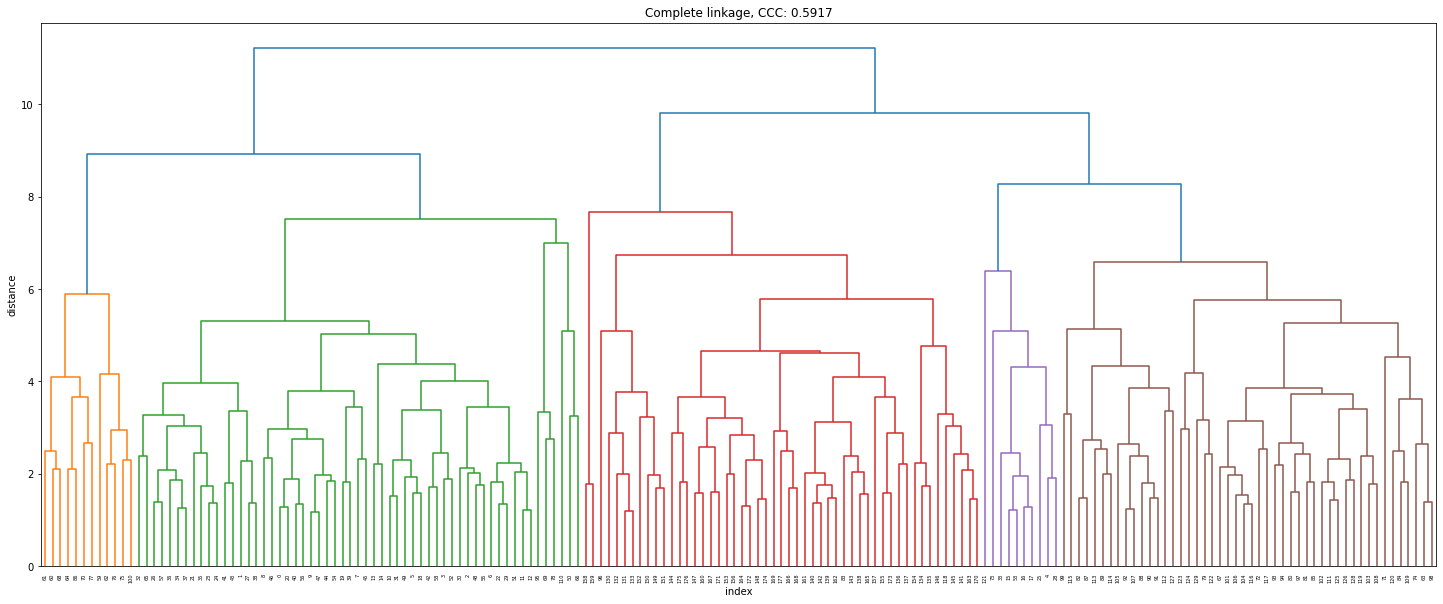

In [14]:
fig, ax = plt.subplots(figsize=(25, 10))
dn = dendrogram(complete_linkage)
plt.xlabel('index')
plt.ylabel('distance')
plt.title(f'Complete linkage, CCC: {cophenet(complete_linkage, distance)[0]:0.4f}')
plt.show()

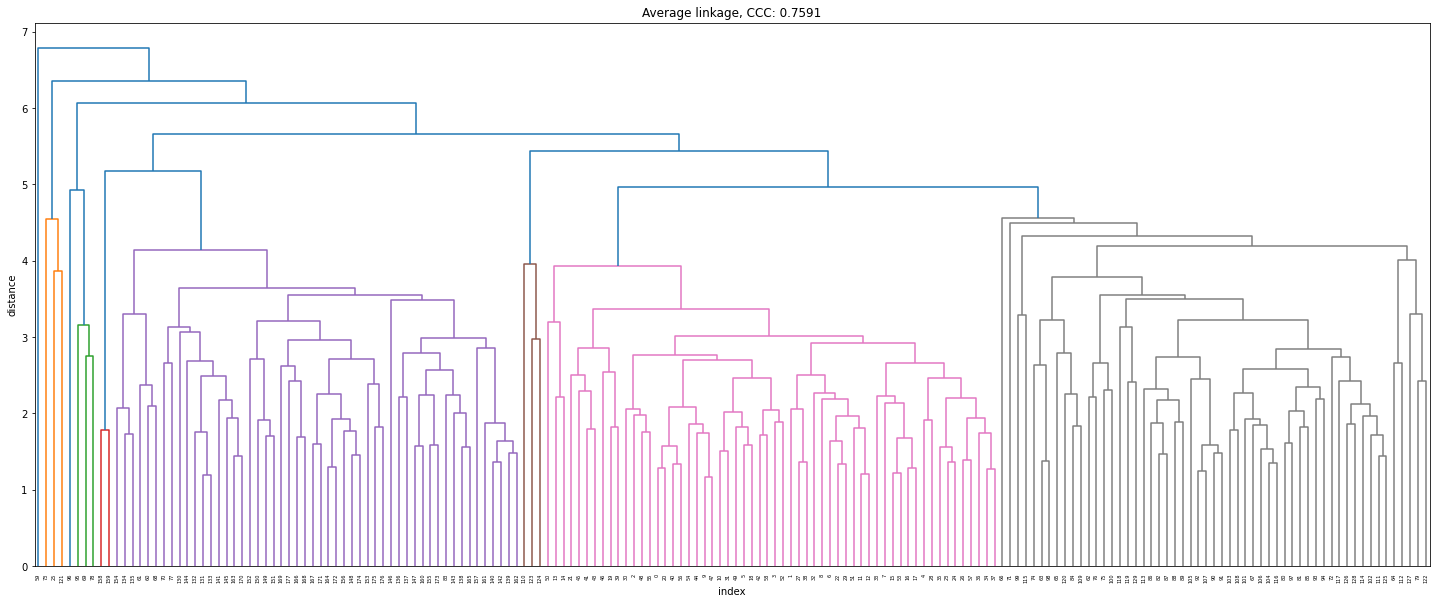

In [15]:
fig, ax = plt.subplots(figsize=(25, 10))
dn = dendrogram(average_linkage)
plt.xlabel('index')
plt.ylabel('distance')
plt.title(f'Average linkage, CCC: {cophenet(average_linkage, distance)[0]:0.4f}')
plt.show()

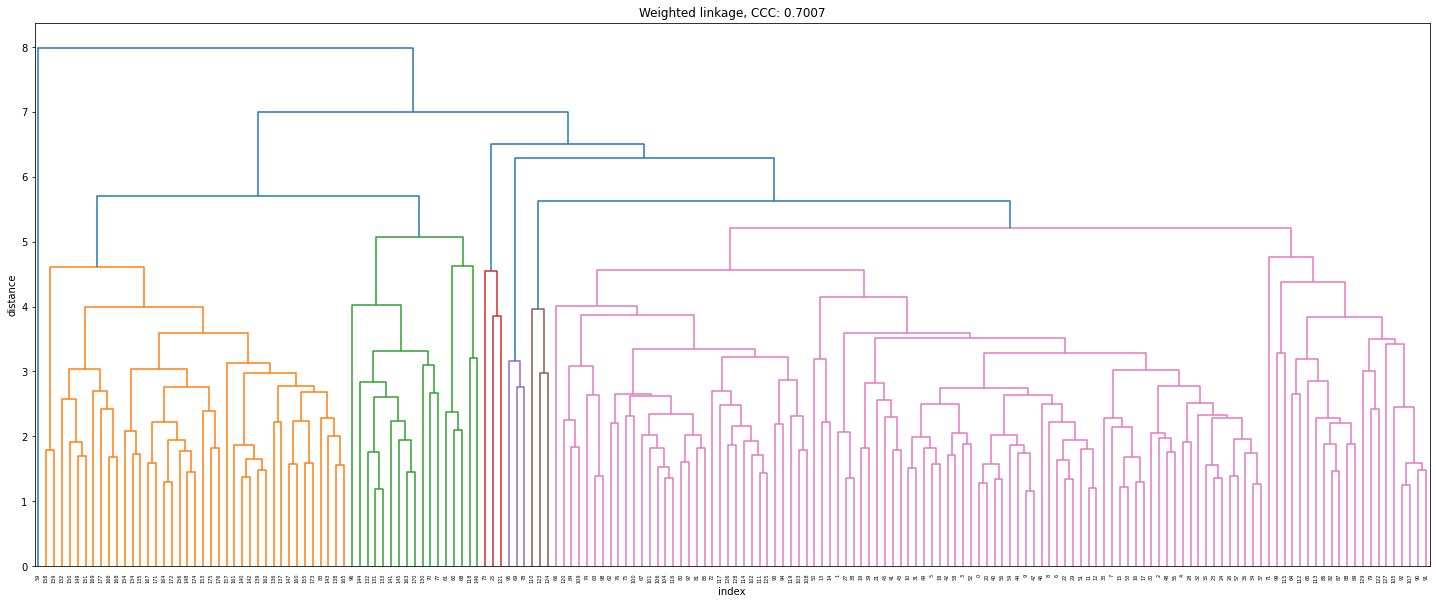

In [16]:
fig, ax = plt.subplots(figsize=(25, 10))
dn = dendrogram(weighted_linkage)
plt.xlabel('index')
plt.ylabel('distance')
plt.title(f'Weighted linkage, CCC: {cophenet(weighted_linkage, distance)[0]:0.4f}')
plt.show()

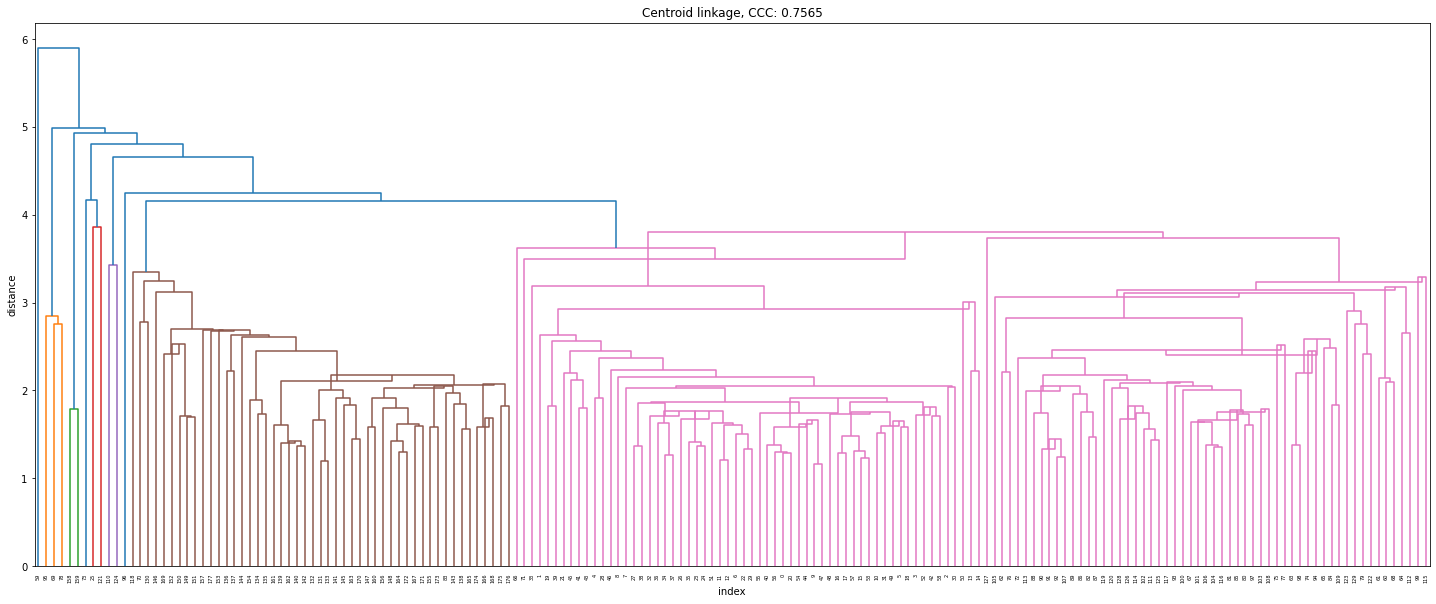

In [17]:
fig, ax = plt.subplots(figsize=(25, 10))
dn = dendrogram(centroid_linkage)
plt.xlabel('index')
plt.ylabel('distance')
plt.title(f'Centroid linkage, CCC: {cophenet(centroid_linkage, distance)[0]:0.4f}')
plt.show()

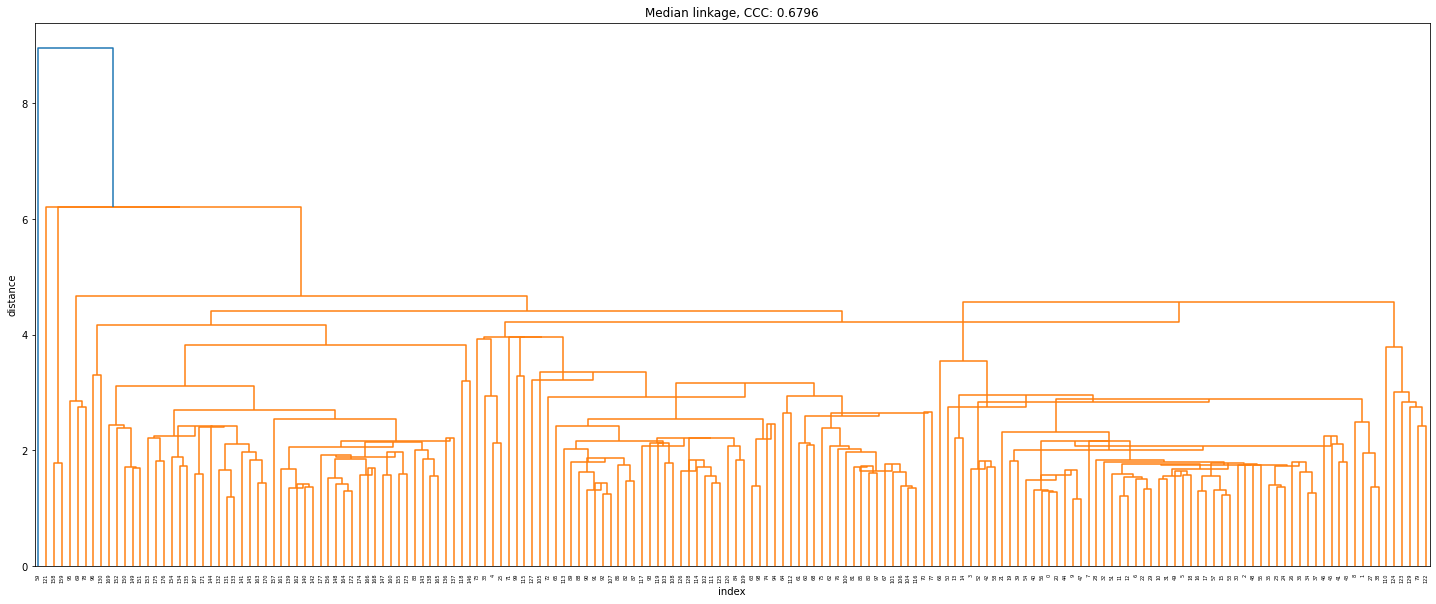

In [18]:
fig, ax = plt.subplots(figsize=(25, 10))
dn = dendrogram(median_linkage)
plt.xlabel('index')
plt.ylabel('distance')
plt.title(f'Median linkage, CCC: {cophenet(median_linkage, distance)[0]:0.4f}')
plt.show()

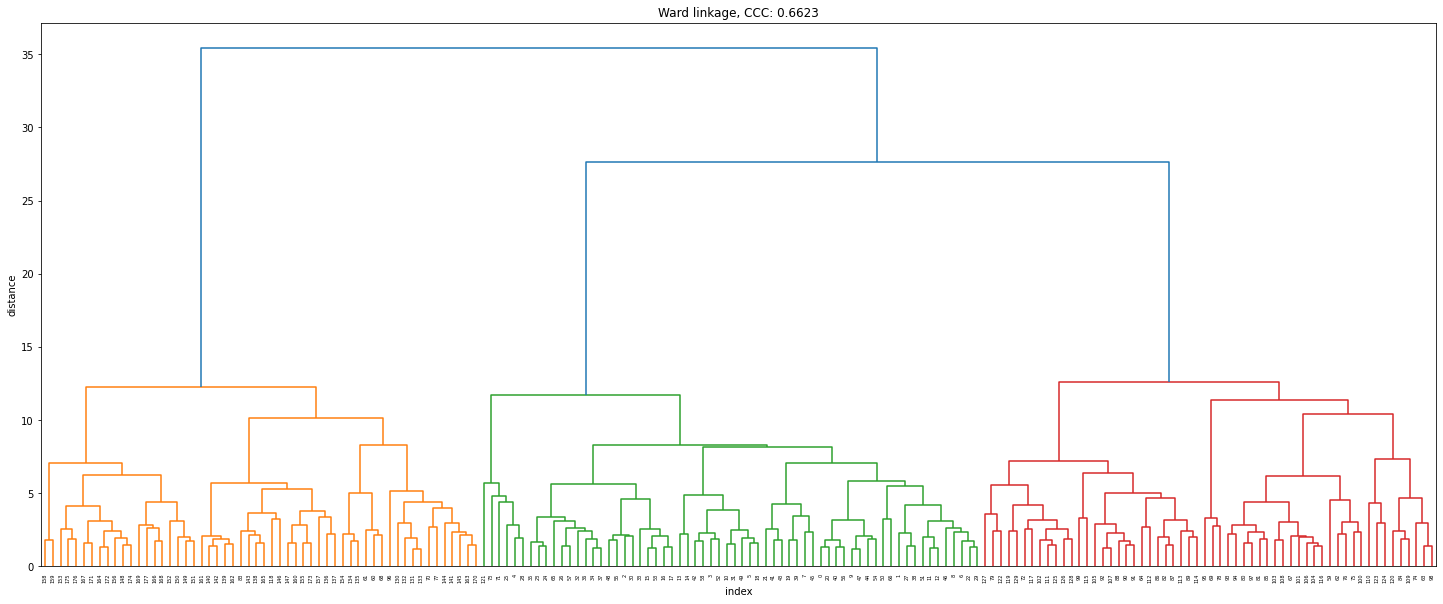

In [19]:
fig, ax = plt.subplots(figsize=(25, 10))
dn = dendrogram(ward_linkage)
plt.xlabel('index')
plt.ylabel('distance')
plt.title(f'Ward linkage, CCC: {cophenet(ward_linkage, distance)[0]:0.4f}')
plt.show()

### 5. Get the top 3 clusters

In [20]:
top_single = fcluster(single_linkage, t=3, criterion='maxclust')

In [21]:
top_complete = fcluster(complete_linkage, t=3, criterion='maxclust')

In [22]:
top_average = fcluster(average_linkage, t=3, criterion='maxclust')

In [23]:
top_weighted = fcluster(weighted_linkage, t=3, criterion='maxclust')

In [24]:
top_centroid = fcluster(centroid_linkage, t=3, criterion='maxclust')

In [25]:
top_median = fcluster(median_linkage, t=3, criterion='maxclust')

In [26]:
top_ward = fcluster(ward_linkage, t=3, criterion='maxclust')

### 6. Compare top 3 clusters with actual data

In [27]:
x_plot = scaled[:,0]
y_plot = scaled[:,1]
z_plot = scaled[:,2]

#### 2-D view

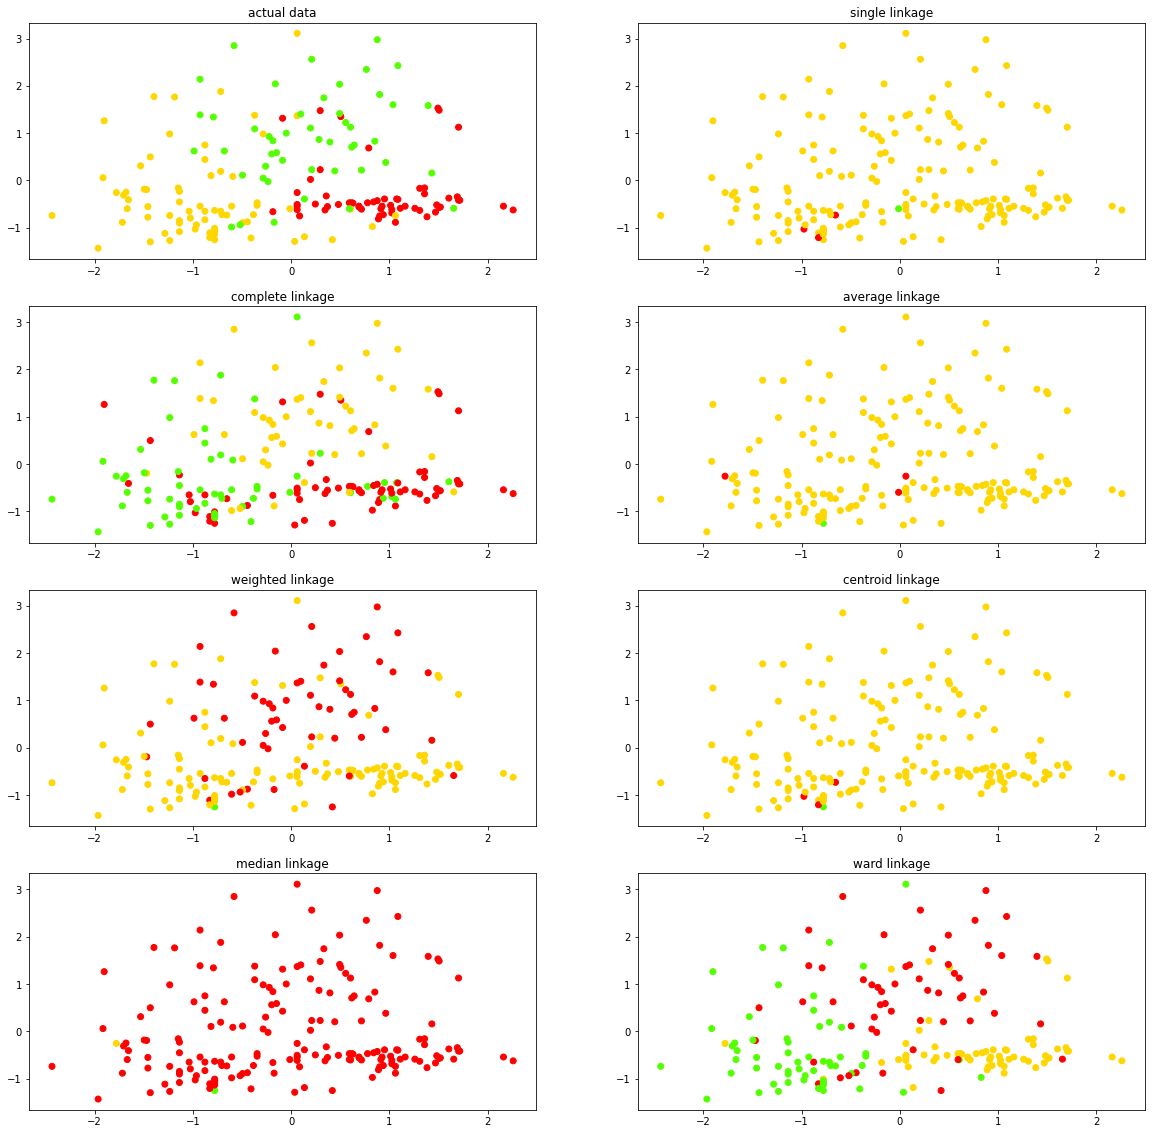

In [28]:
fig, ax = plt.subplots(4,2, figsize=(20,20))
ax[0,0].scatter(x_plot, y_plot, c=y_data, cmap='prism')
ax[0,0].set_title('actual data')

ax[0,1].scatter(x_plot, y_plot, c=top_single, cmap='prism')
ax[0,1].set_title('single linkage')

ax[1,0].scatter(x_plot, y_plot, c=top_complete, cmap='prism')
ax[1,0].set_title('complete linkage')

ax[1,1].scatter(x_plot, y_plot, c=top_average, cmap='prism')
ax[1,1].set_title('average linkage')

ax[2,0].scatter(x_plot, y_plot, c=top_weighted, cmap='prism')
ax[2,0].set_title('weighted linkage')

ax[2,1].scatter(x_plot, y_plot, c=top_centroid, cmap='prism')
ax[2,1].set_title('centroid linkage')

ax[3,0].scatter(x_plot, y_plot, c=top_median, cmap='prism')
ax[3,0].set_title('median linkage')

ax[3,1].scatter(x_plot, y_plot, c=top_ward, cmap='prism')
ax[3,1].set_title('ward linkage')

plt.show()

#### 3-D view

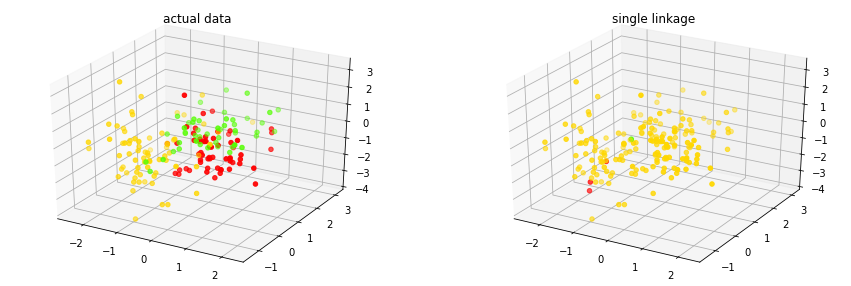

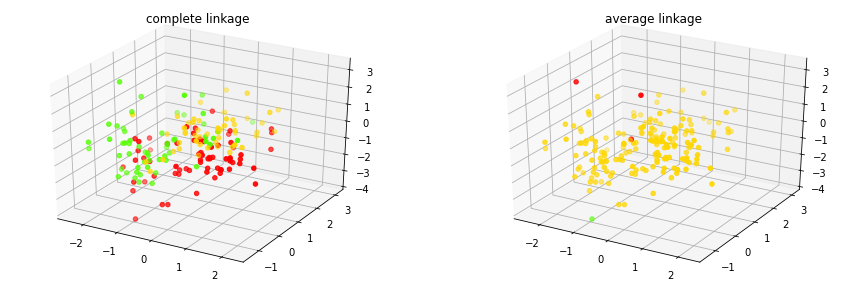

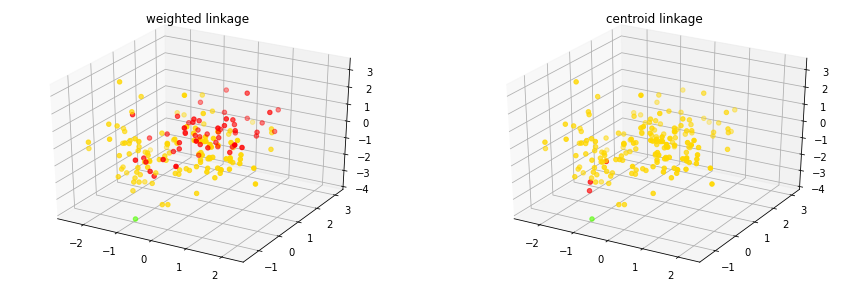

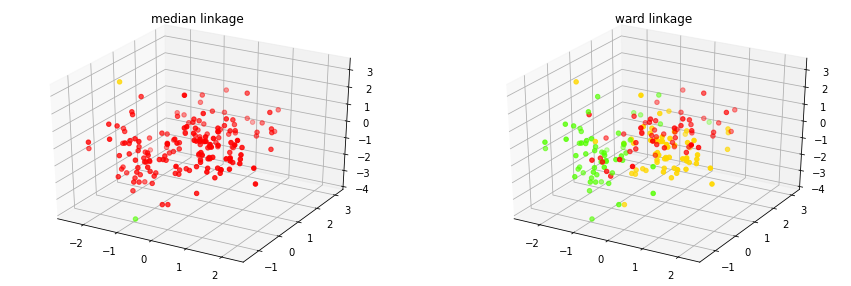

In [29]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(xs=x_plot, ys=y_plot, zs=z_plot, c=y_data, cmap='prism')
plt.title('actual data')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(xs=x_plot, ys=y_plot, zs=z_plot, c=top_single, cmap='prism')
plt.title('single linkage')

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(xs=x_plot, ys=y_plot, zs=z_plot, c=top_complete, cmap='prism')
plt.title('complete linkage')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(xs=x_plot, ys=y_plot, zs=z_plot, c=top_average, cmap='prism')
plt.title('average linkage')

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(xs=x_plot, ys=y_plot, zs=z_plot, c=top_weighted, cmap='prism')
plt.title('weighted linkage')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(xs=x_plot, ys=y_plot, zs=z_plot, c=top_centroid, cmap='prism')
plt.title('centroid linkage')

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(xs=x_plot, ys=y_plot, zs=z_plot, c=top_median, cmap='prism')
plt.title('median linkage')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(xs=x_plot, ys=y_plot, zs=z_plot, c=top_ward, cmap='prism')
plt.title('ward linkage')

plt.show()

##### Other columns

In [30]:
x_plot = scaled[:,10]
y_plot = scaled[:,11]
z_plot = scaled[:,12]

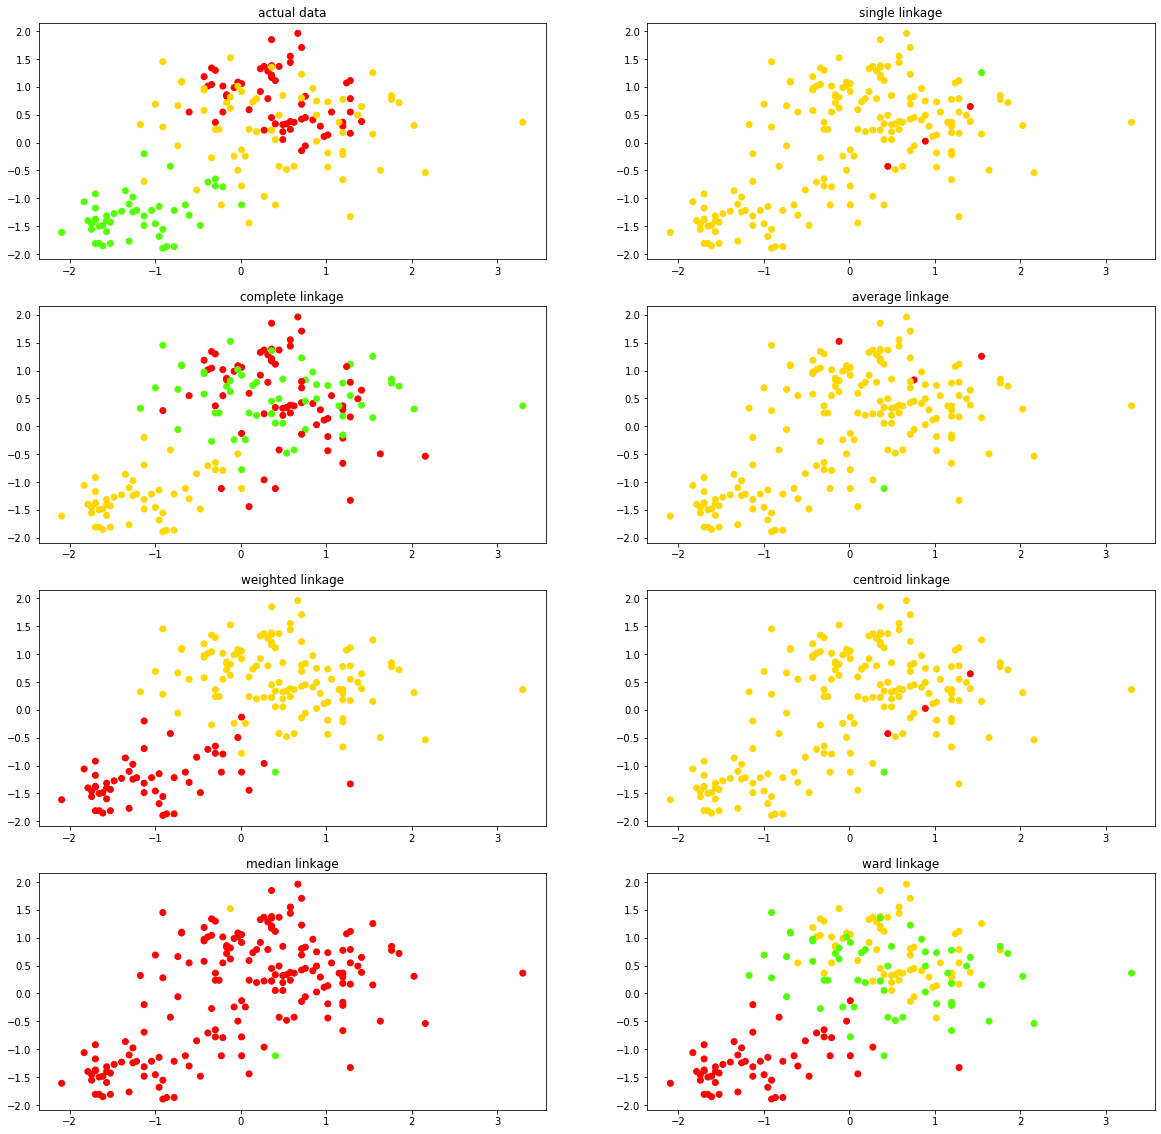

In [31]:
fig, ax = plt.subplots(4,2, figsize=(20,20))
ax[0,0].scatter(x_plot, y_plot, c=y_data, cmap='prism')
ax[0,0].set_title('actual data')

ax[0,1].scatter(x_plot, y_plot, c=top_single, cmap='prism')
ax[0,1].set_title('single linkage')

ax[1,0].scatter(x_plot, y_plot, c=top_complete, cmap='prism')
ax[1,0].set_title('complete linkage')

ax[1,1].scatter(x_plot, y_plot, c=top_average, cmap='prism')
ax[1,1].set_title('average linkage')

ax[2,0].scatter(x_plot, y_plot, c=top_weighted, cmap='prism')
ax[2,0].set_title('weighted linkage')

ax[2,1].scatter(x_plot, y_plot, c=top_centroid, cmap='prism')
ax[2,1].set_title('centroid linkage')

ax[3,0].scatter(x_plot, y_plot, c=top_median, cmap='prism')
ax[3,0].set_title('median linkage')

ax[3,1].scatter(x_plot, y_plot, c=top_ward, cmap='prism')
ax[3,1].set_title('ward linkage')

plt.show()

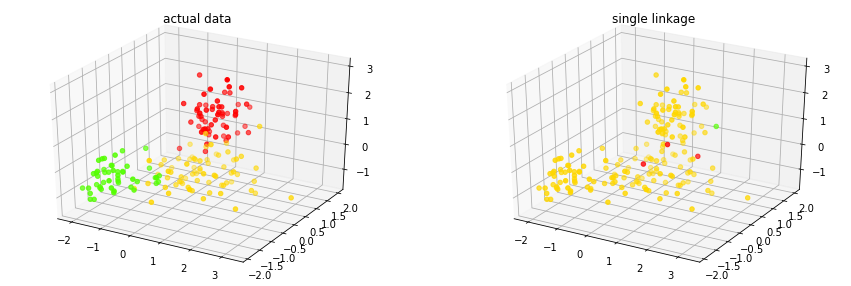

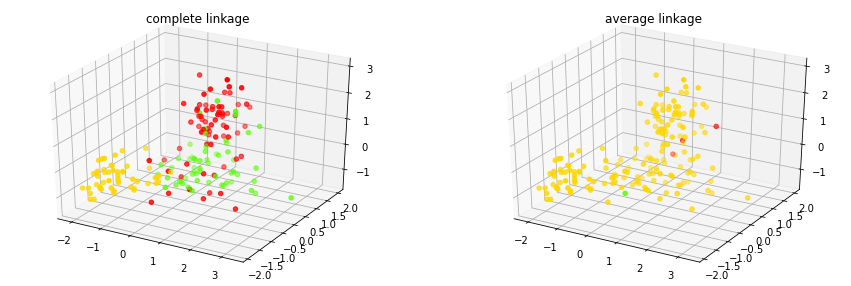

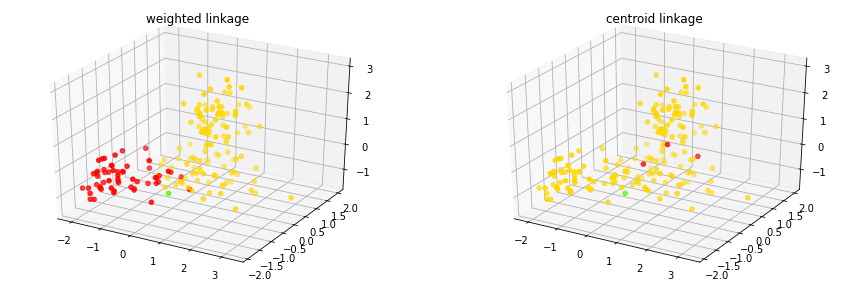

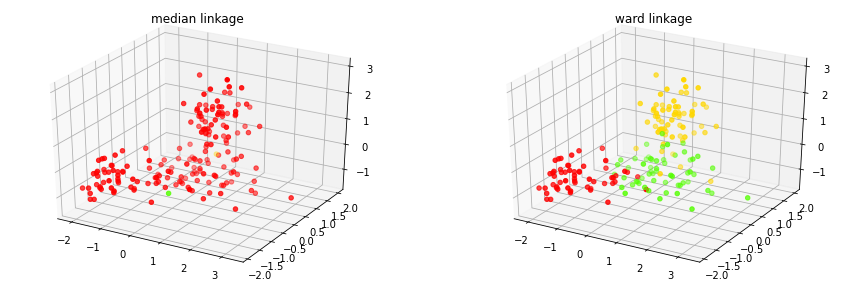

In [32]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(xs=x_plot, ys=y_plot, zs=z_plot, c=y_data, cmap='prism')
plt.title('actual data')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(xs=x_plot, ys=y_plot, zs=z_plot, c=top_single, cmap='prism')
plt.title('single linkage')

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(xs=x_plot, ys=y_plot, zs=z_plot, c=top_complete, cmap='prism')
plt.title('complete linkage')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(xs=x_plot, ys=y_plot, zs=z_plot, c=top_average, cmap='prism')
plt.title('average linkage')

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(xs=x_plot, ys=y_plot, zs=z_plot, c=top_weighted, cmap='prism')
plt.title('weighted linkage')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(xs=x_plot, ys=y_plot, zs=z_plot, c=top_centroid, cmap='prism')
plt.title('centroid linkage')

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(xs=x_plot, ys=y_plot, zs=z_plot, c=top_median, cmap='prism')
plt.title('median linkage')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(xs=x_plot, ys=y_plot, zs=z_plot, c=top_ward, cmap='prism')
plt.title('ward linkage')

plt.show()

### Build table with label count

In [33]:
C = top_single
y = y_data
labels = np.unique(y)
l_counts = []
for k in range(3):
    k_counts = []
    y_k = y[C==k]
    for label in labels:
        k_counts.append(len(y_k[y_k == label]))
    l_counts.append(k_counts)

df = pd.DataFrame(data=l_counts, columns=labels)
print('Single linkage')
df

Single linkage


,0,1,2
0,0,0,0
1,0,3,0
2,59,67,48


In [34]:
C = top_complete
y = y_data
labels = np.unique(y)
l_counts = []
for k in range(3):
    k_counts = []
    y_k = y[C==k]
    for label in labels:
        k_counts.append(len(y_k[y_k == label]))
    l_counts.append(k_counts)

df = pd.DataFrame(data=l_counts, columns=labels)
print('Complete linkage')
df

Complete linkage


,0,1,2
0,0,0,0
1,51,18,0
2,0,3,48


In [35]:
C = top_average
y = y_data
labels = np.unique(y)
l_counts = []
for k in range(3):
    k_counts = []
    y_k = y[C==k]
    for label in labels:
        k_counts.append(len(y_k[y_k == label]))
    l_counts.append(k_counts)

df = pd.DataFrame(data=l_counts, columns=labels)
print('Average linkage')
df

Average linkage


,0,1,2
0,0,0,0
1,1,2,0
2,58,68,48


In [36]:
C = top_weighted
y = y_data
labels = np.unique(y)
l_counts = []
for k in range(3):
    k_counts = []
    y_k = y[C==k]
    for label in labels:
        k_counts.append(len(y_k[y_k == label]))
    l_counts.append(k_counts)

df = pd.DataFrame(data=l_counts, columns=labels)
print('Weighted linkage')
df

Weighted linkage


,0,1,2
0,0,0,0
1,0,8,48
2,59,62,0


In [37]:
C = top_centroid
y = y_data
labels = np.unique(y)
l_counts = []
for k in range(3):
    k_counts = []
    y_k = y[C==k]
    for label in labels:
        k_counts.append(len(y_k[y_k == label]))
    l_counts.append(k_counts)

df = pd.DataFrame(data=l_counts, columns=labels)
print('Centroid linkage')
df

Centroid linkage


,0,1,2
0,0,0,0
1,0,3,0
2,59,67,48


In [38]:
C = top_median
y = y_data
labels = np.unique(y)
l_counts = []
for k in range(3):
    k_counts = []
    y_k = y[C==k]
    for label in labels:
        k_counts.append(len(y_k[y_k == label]))
    l_counts.append(k_counts)

df = pd.DataFrame(data=l_counts, columns=labels)
print('Median linkage')
df

Median linkage


,0,1,2
0,0,0,0
1,59,69,48
2,0,1,0


In [39]:
C = top_ward
y = y_data
labels = np.unique(y)
l_counts = []
for k in range(3):
    k_counts = []
    y_k = y[C==k]
    for label in labels:
        k_counts.append(len(y_k[y_k == label]))
    l_counts.append(k_counts)

df = pd.DataFrame(data=l_counts, columns=labels)
print('Ward linkage')
df

Ward linkage


,0,1,2
0,0,0,0
1,0,8,48
2,59,5,0
